<a href="https://colab.research.google.com/github/sonchangwoo95/github_test/blob/main/LSTM_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [ ]:
data = pd.read_csv('sample_data/005930.KS_filter.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-01,25980,26180,25420,25580,22242.25781,13557800
1,2016-04-04,25580,26100,25580,26100,22694.39844,9402300
2,2016-04-05,25980,25980,25200,25200,21911.83789,11815950
3,2016-04-06,25380,25820,25360,25700,22346.59375,9211700
4,2016-04-07,26000,26000,25160,25380,22068.34766,12939750


In [ ]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [ ]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [ ]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1058, 50, 1), (117, 50, 1))

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
106/106 [==============================] - 7s 42ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 2/20
106/106 [==============================] - 4s 36ms/step - loss: 8.1595e-04 - val_loss: 0.0014
Epoch 3/20
106/106 [==============================] - 4s 37ms/step - loss: 5.8585e-04 - val_loss: 9.4880e-04
Epoch 4/20
106/106 [==============================] - 4s 37ms/step - loss: 4.4990e-04 - val_loss: 6.0176e-04
Epoch 5/20
106/106 [==============================] - 4s 36ms/step - loss: 3.6125e-04 - val_loss: 5.4682e-04
Epoch 6/20
106/106 [==============================] - 4s 36ms/step - loss: 3.2411e-04 - val_loss: 6.9648e-04
Epoch 7/20
106/106 [==============================] - 4s 36ms/step - loss: 2.9662e-04 - val_loss: 0.0012
Epoch 8/20
106/106 [==============================] - 4s 36ms/step - loss: 2.7462e-04 - val_loss: 5.9186e-04
Epoch 9/20
106/106 [==============================] - 4s 36ms/step - loss: 2.5098e-04 - val_loss: 0.0013
Epoch 10/20
106/106 [==================

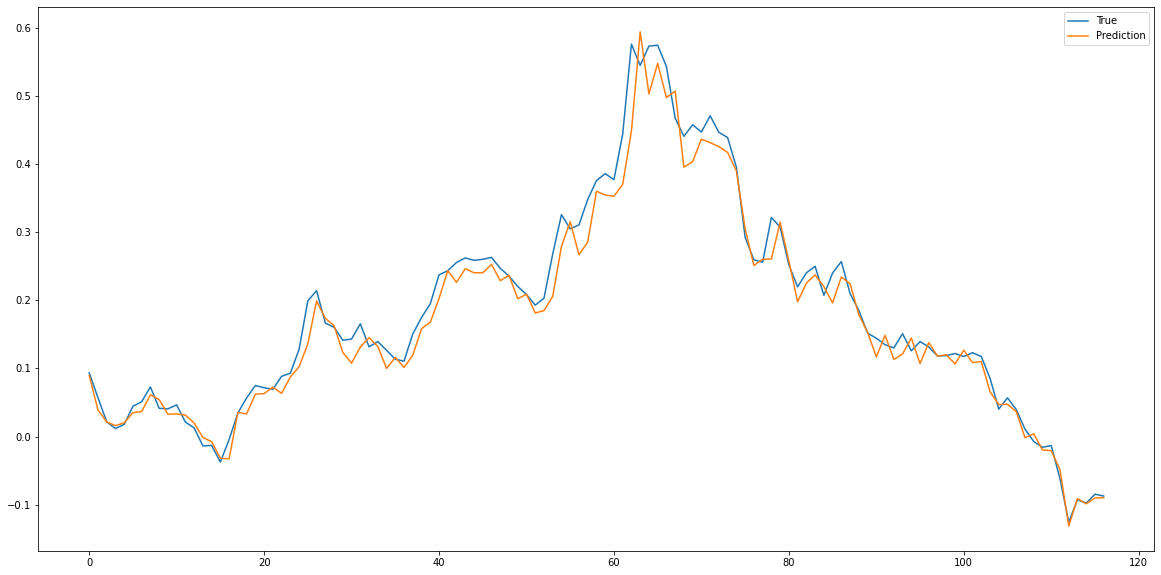

In [ ]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

# 실제추적되는 그래프가 아님